In [129]:
# Load Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [130]:
# OS setup
main_path = os.getcwd()
data_path = os.path.join(main_path, 'data')
csv_path = os.path.join(main_path, 'info.csv') # csv 파일을 저장할 위치

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [131]:
# Save empty csv
if not os.path.exists(csv_path):
    df = pd.DataFrame(columns=['state', 'gender', 'age', 'source', 'file', 'detail'])
    df.to_csv(csv_path)

In [132]:
# %run donateacry_corpus_data_trans.ipynb

In [133]:
# %run asvp-esd-data-trans.ipynb

In [134]:
# % run giulbia-data-trans.ipynb

In [135]:
# Get duration of sounds
# %run add_duration.ipynb

In [136]:
# Check csv
df = pd.read_csv(csv_path, index_col=0)
df.state = df.state.astype('category')
df.gender = df.gender.astype('category')
df.age = df.age.astype('category')
df.source = df.source.astype('category')

df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1903
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   state     1904 non-null   category
 1   gender    1796 non-null   category
 2   age       457 non-null    category
 3   source    1904 non-null   category
 4   file      1904 non-null   object  
 5   detail    1208 non-null   object  
 6   duration  1904 non-null   float64 
dtypes: category(4), float64(1), object(2)
memory usage: 68.0+ KB


,state,gender,age,source,file,detail,duration
1901,happy,NaN,NaN,giulbia,laugh_1.m4a_59.wav,NaN,5.0
1902,happy,NaN,NaN,giulbia,laugh_1.m4a_71.wav,NaN,5.0
1903,happy,NaN,NaN,giulbia,laugh_1.m4a_65.wav,NaN,5.0


In [137]:
# data Overview
print('float values')
df.describe().T

float values


,count,mean,std,min,25%,50%,75%,max
duration,1904.0,7.437606,3.298063,0.522437,6.0,7.0,9.0,86.387375


In [138]:
print('string values')
df.describe(include='O').T

string values


,count,unique,top,freq
file,1904,1904,999bf14b-e417-4b44-b746-9253f81efe38-143097400...,1
detail,1208,11,sad,1052


In [139]:
print('category values')
df.describe(include='category').T

category values


,count,unique,top,freq
state,1904,13,sad,1180
gender,1796,2,m,1615
age,457.0,5.0,26.0,162.0
source,1904,3,asvp-esd,1339


In [140]:
('string values')
df.describe(include='O')

print('category values')
df.describe(include='category')

category values


,state,gender,age,source
count,1904,1796,457.0,1904
unique,13,2,5.0,3
top,sad,m,26.0,asvp-esd
freq,1180,1615,162.0,1339


state 에 따른 파일의 개수와 비율
sad        state exists in 61.97% of  1180 files.
hungry     state exists in 20.06% of   382 files.
happy      state exists in 11.45% of   218 files.
calm       state exists in 01.58% of    30 files.
tired      state exists in 01.26% of    24 files.
discomfort state exists in 01.05% of    20 files.
belly_pain state exists in 00.84% of    16 files.
fearful    state exists in 00.53% of    10 files.
burping    state exists in 00.42% of     8 files.
ch         state exists in 00.37% of     7 files.
bored      state exists in 00.32% of     6 files.
pain       state exists in 00.11% of     2 files.
disgust    state exists in 00.05% of     1 files.


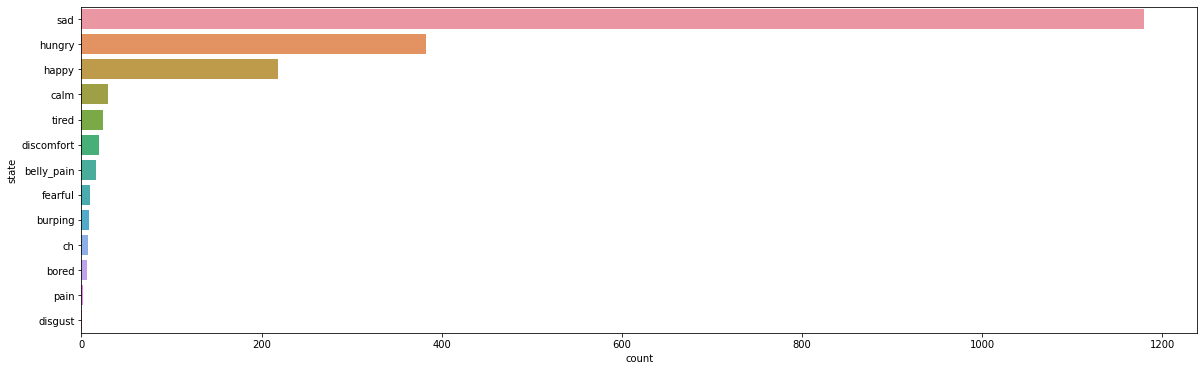

In [141]:
# 상태에 따른 파일의 개수를 알아보자.

def print_category_info(category: str, sub=None):
    print(f"{category} 에 따른 파일의 개수와 비율")
    value_counts = df[category].value_counts()
    keys = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    rates = list(df[category].value_counts(normalize=True).values)

    for i in range(len(keys)):
        print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.countplot(y=category, 
                data=df,
                order=keys,
                hue=sub,
                dodge=False)

print_category_info('state')

source 에 따른 파일의 개수와 비율
asvp-esd   state exists in 70.33% of  1339 files.
donate_a_cry state exists in 24.00% of   457 files.
giulbia    state exists in 05.67% of   108 files.


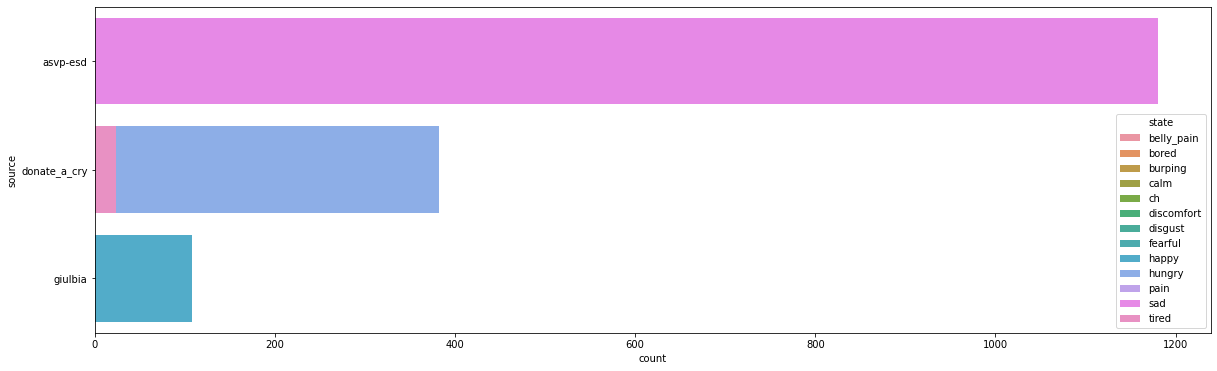

In [142]:
# 출처에 따른 파일의 개수를 알아보자.
print_category_info('source', sub='state')

NULL value counts: 108

Male exists in 84.82% of 1615 files.
Male exists in 15.18% of  289 files.


<Axes: xlabel='count', ylabel='gender'>

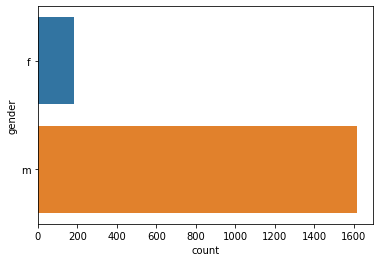

In [143]:
print(f"NULL value counts: {df.gender.isna().sum()}\n")

# 남성 자료가 많다.
gender_count = (df.gender == 'm').value_counts().values
gender_rate = (df.gender == 'm').value_counts(normalize=True).values
print(f"Male exists in {gender_rate[0]*100:05.2f}% of {gender_count[0]:4d} files.")
print(f"Male exists in {gender_rate[1]*100:05.2f}% of {gender_count[1]:4d} files.")

sns.countplot(y='gender',data=df)

<Axes: xlabel='Count', ylabel='duration'>

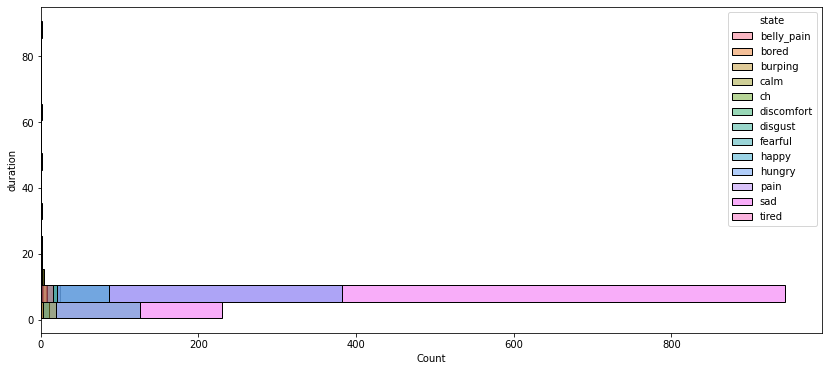

In [144]:
# 자료의 시간 비율에 대해 알아보자.

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(y='duration',
             binwidth=5,
             data=df,
             hue='state')

<Axes: xlabel='count', ylabel='duration'>

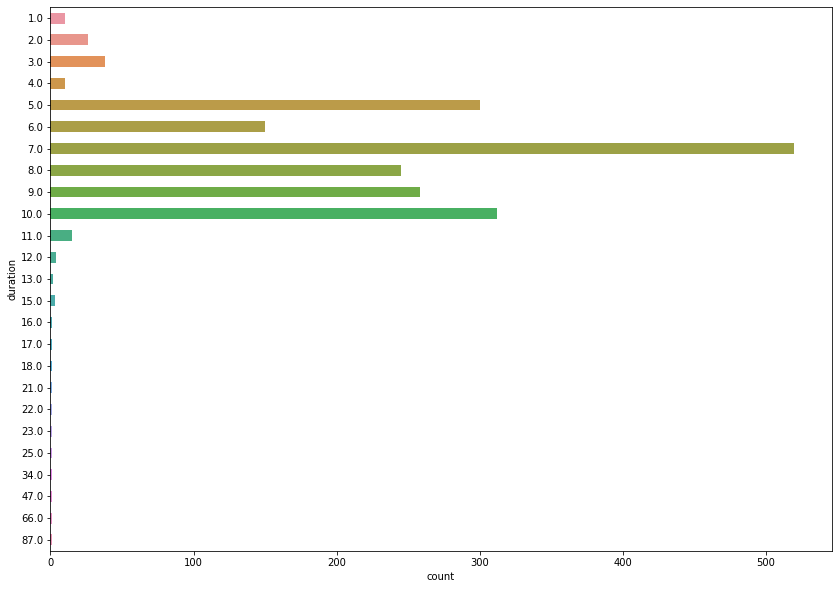

In [145]:
# 소수점 내림을 통해 더 자세히 알아보자

fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(y='duration', 
              data=pd.DataFrame(df['duration'].apply(np.ceil)),
              width=0.5)